<a href="https://colab.research.google.com/github/lucyzandile/unsupervised-predict-streamlit-template/blob/master/Team_15_Unsupervised_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


## Problem Statement

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Preprocessing)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## Importing packages

In [2]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np

import pandas as pd



import matplotlib.pyplot as plt

from matplotlib import rc

import seaborn as sns

from plotly.offline import init_notebook_mode, plot, iplot

import plotly.graph_objs as go

init_notebook_mode(connected=True)


from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import CountVectorizer


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="two"></a>
## Loading the Data

In [4]:
# importing datasets

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

#df_gscores = pd.read_csv("genome_scores.csv")

df_gtags = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/genome_tags.csv")

imdb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/imdb_data.csv")

df_links = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/links.csv")

movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movies.csv")

#df_tags = pd.read_csv("")

### Overview of the datasets

In [ ]:
#Checking df_train dataset head
display(train.head())

#Checking df_train dataset information
train.info()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
#Checking df_test dataset head
display(test.head())

#Checking df_test dataset information
test.info()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [ ]:
#Checking df_gscores dataset head
#display(df_gscores.head())

#Checking df_gscores dataset information
#df_gscores.info()

In [ ]:
#Checking df_gtags dataset head
display(df_gtags.head())

#Checking df_gtags dataset information
df_gtags.info()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [ ]:
#Checking imdb dataset head
display(imdb.head())

#Checking imdb dataset information
imdb.info()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
#Checking df_links dataset head
display(df_links.head())

#Checking df_links dataset information
df_links.info()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [ ]:
#Checking movies dataset head
display(movies.head())

#Checking movies dataset information
movies.info()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
#Checking df_tags dataset head
#display(df_tags.head())

#Checking df_tags dataset information
#df_tags.info()

<a id="three"></a>
## Exploratory Data Analysis (EDA)

In [32]:
# Create a copies

df_train = train.copy()

df_movies = movies.copy()

df_imdb = imdb.copy()

In [33]:
#extracting released year
df_movies['release_year']=df_movies['title'].str[-5:-1] 
#spliting the genres into a list
df_movies['genres']=df_movies['genres'].str.split('|') 
#concatinate ratings with movies dataframe
df_movies=pd.concat([df_movies,df_train['rating']],axis=1).dropna() 
df_movies.head()

,movieId,title,genres,release_year,rating
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5
2,3.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0
3,4.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0
4,5.0,Father of the Bride Part II (1995),[Comedy],1995,3.0


In [34]:
#spliting the title cast into a list
df_imdb['title_cast']=df_imdb['title_cast'].str.split('|') 
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


### Latest Popular Movies by ratings (Top 20) from 2000 to date

In [24]:
#Below is the function that extract porpular movies

def extract_popular_movies(df1,df2):
    """
    Retruns porpular movies from based on avarage ratings and total ratings count.

    Parameters
    ----------
    df1: DataFrame from train_df.
    df2: DataFrame from movies_df.
    
    Return
    ------
    Porpular_movies(DataFrame): returns dataframe of porpular movies.
    
    Example
    -------
    >>> train = pd.read_csv('train.csv')
    >>> movie = pd.read_csv('train.csv')
    
    >>> extract_popular_movies(train, movie).head(2)
    
    -----------------------------------------------
           title| rating|rating_counts|release_year
    -----------------------------------------------
    0 |abc(2001)| 3.2341|        2435 |       2001
    1 |def(2002)| 5.2343|        534  |       2002    
      
    """
    #Calculating the avarage rating and storing the results as a DataFrame
    rating = pd.DataFrame(df1.groupby('movieId')['rating'].mean())
    #Calculating the total ratings count and storing the results as a DataFrame
    rating['ratings_count'] = pd.DataFrame(df1.groupby('movieId')['rating'].count())
    rating=rating.sort_values(by=['ratings_count','ratings_count'],ascending=False).reset_index()
    
    #Joining the Two DataFrames
    inner_join = pd.merge(rating,df2,on ='movieId',how ='inner')
    popular_movies=inner_join[['title','rating_x','ratings_count','release_year']].rename(columns={"rating_x": "rating"})
    
    return popular_movies

In [35]:
#Create the variable "data"
data=extract_popular_movies(train,df_movies)

#Extracting latest movies from 2000 till to date
latest_movies=data[data['release_year']>'2000'][['rating','ratings_count','title']]

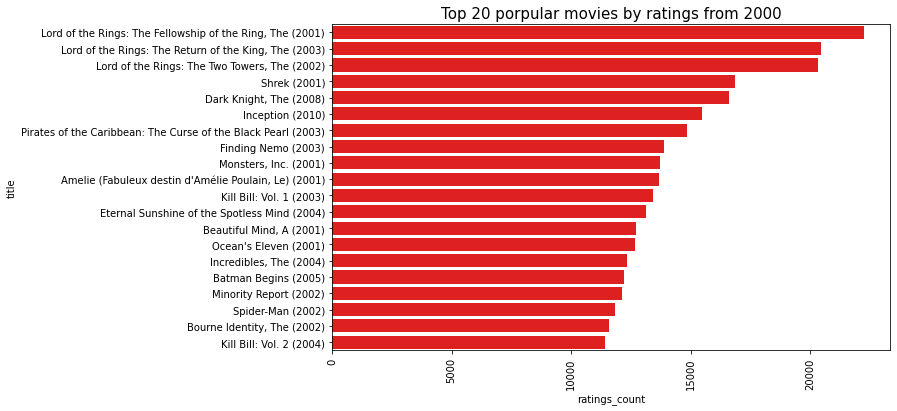

In [36]:
#Plotting the latest movies from 2000 using bar-plots
plt.figure(figsize = (10,6))
ax=sns.barplot(y='title', x='ratings_count', data=latest_movies.head(20),color='red')
ax.set_title('Top 20 porpular movies by ratings from 2000',fontsize=15)
plt.xticks(rotation=90)
plt.show()

From the above plot, we observe that the based on average rating and the total count of ratings, the movie Lord of the Rings: The Fellowship of the Ring (2001) had the most rating counts of over 21 000 when we considered movies from 2000 till date.

### Popular Cast

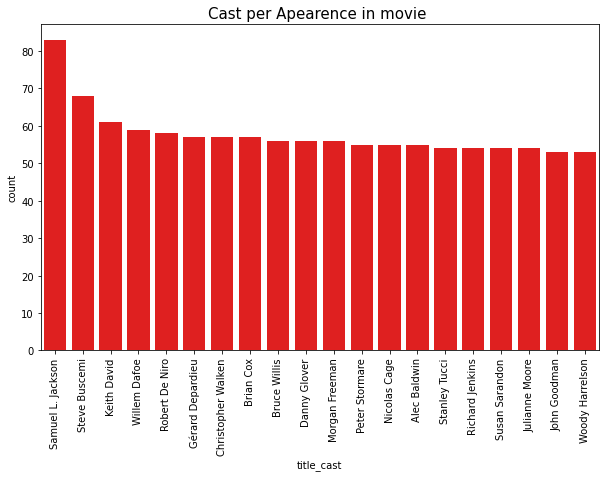

In [37]:
#Plotting popular cast using count-plot
plt.figure(figsize = (10,6))
title_cast=df_imdb['title_cast'].explode()
ax=sns.countplot(x= title_cast, order = title_cast.value_counts().index[:20],color='red')
ax.set_title('Cast per Apearence in movie ',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Observation: Samuel L Jackson was the popular cast as he appeared in over 80 movies from our database.

### Popular Director

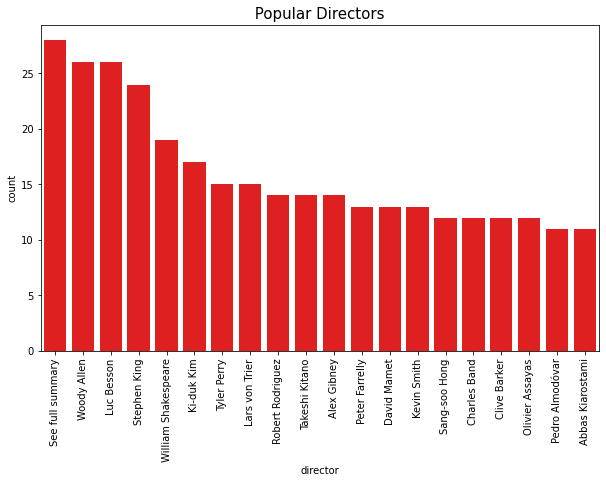

In [28]:
#Plotting popular cast using count-plot
plt.figure(figsize = (10,6))
director=df_imdb['director'].explode()
ax=sns.countplot(x= director, order = director.value_counts().index[:20],color='red')
ax.set_title(' Popular Directors ',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Observation: Luc Besson was the popular director as he directed over 25 movies from our database.

### Popular Genres

In [29]:
pip install squarify

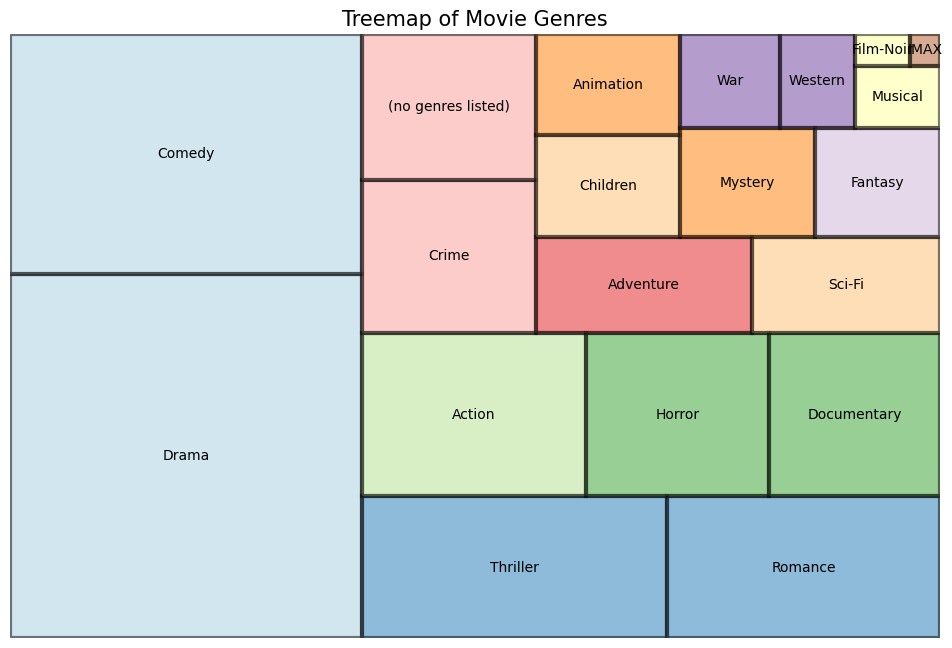

In [30]:
import squarify
#Create variable "temp_df"
temp_df = df_movies['genres'].explode().value_counts().reset_index()

#Plotting popular genres using Treemap
sizes=np.array(temp_df['genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':10})
plt.title('Treemap of Movie Genres', fontsize = 15)
plt.axis('off')
plt.show()

The top 5 genres are, in that respect order: Drama, Comedy, Action, Thriller, and Romance.


### Average budget per genre

In [ ]:
#Merging the imdb_df and movies_df
movies_imdb_df = pd.merge(df_imdb,df_movies,on ='movieId',how ='inner')


In [ ]:
#Create variable "budget_genre"
budget_genre=movies_imdb_df[['genres','budget']].explode('genres')
budget_genre['budget']=budget_genre['budget'].str.replace(',', "").str.extract('(\d+)', expand=False).astype('float')

In [ ]:
#Plotting an average budget per genre using line-plot
#plt.figure(figsize=(10,6))
#ax=sns.lineplot(x="genres", y="budget", palette = ["red"],  data=budget_genre)
#ax.set_title('Average budget per genre',fontsize=15)
#plt.xticks(rotation=90)
#plt.show()

Observation: Movies with the genre War had the biggest budget according to our database

<a id="four"></a>
## Data Preprocessing

In [5]:
df_movies1 = movies.copy()

df_imdb1 = imdb.copy()

In [6]:
# Merge the df_merge and df_imdb
df_merge = df_movies1.merge(df_imdb1, on='movieId')

#Checking df_merge dataset head
display(df_merge.head())

#Checking for null values
display(df_merge.isnull().sum())

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


movieId              0
title                0
genres               0
title_cast        9665
director          9519
runtime          11345
budget           17583
plot_keywords    10482
dtype: int64

In [7]:
df_merge = df_merge[['title','genres', 'title_cast', 'director', 'plot_keywords']]
df_merge.head()

,title,genres,title_cast,director,plot_keywords
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game
2,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry
3,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...
4,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion


In [8]:
# convert data types to strings for string handling
df_merge['genres'] = df_merge.genres.astype(str)
df_merge['title_cast'] = df_merge.title_cast.astype(str)
df_merge['director'] = df_merge.director.astype(str)
df_merge['plot_keywords'] = df_merge.plot_keywords.astype(str)

# discarding the line between genres and putting the genres in a list of words
df_merge['genres'] = df_merge['genres'].map(lambda x: x.lower().split('|'))

# discarding the liness between the actors full names and getting only the first three names
df_merge['title_cast'] = df_merge['title_cast'].map(lambda x: x.split('|')[:3])

#converting name and surname of directors to lowercase
df_merge['director'] = df_merge['director'].apply(lambda x: "".join(x.lower() for x in x.split()))

# discarding the line between plot_keywords and putting the plot_keywords in a list of words
df_merge['plot_keywords'] = df_merge['plot_keywords'].map(lambda x: x.lower().split('|'))


# merging together first and last name for each title_cast and director, so it's considered as one word 
for index, row in df_merge.iterrows():
    row['title_cast'] = [x.lower().replace(' ','') for x in row['title_cast']]
    row['director'] = ''.join(row['director']).lower()

In [9]:
df_merge.set_index('title', inplace = True)
df_merge.head()

,genres,title_cast,director,plot_keywords
title,,,,
Toy Story (1995),"[adventure, animation, children, comedy, fantasy]","[tomhanks, timallen, donrickles]",johnlasseter,"[toy, rivalry, cowboy, cgi animation]"
Jumanji (1995),"[adventure, children, fantasy]","[robinwilliams, jonathanhyde, kirstendunst]",jonathanhensleigh,"[board game, adventurer, fight, game]"
Grumpier Old Men (1995),"[comedy, romance]","[waltermatthau, jacklemmon, sophialoren]",markstevenjohnson,"[boat, lake, neighbor, rivalry]"
Waiting to Exhale (1995),"[comedy, drama, romance]","[whitneyhouston, angelabassett, lorettadevine]",terrymcmillan,"[black american, husband wife relationship, be..."
Father of the Bride Part II (1995),[comedy],"[stevemartin, dianekeaton, martinshort]",alberthackett,"[fatherhood, doberman, dog, mansion]"


In [10]:
df_merge['bag_of_words'] = ''
columns = df_merge.columns
for index, row in df_merge.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
df_merge.drop(columns = [col for col in df_merge.columns if col!= 'bag_of_words'], inplace = True)

In [11]:
# instantiating and generating the count matrix
count_vect = CountVectorizer()
count_vect_matrix = count_vect.fit_transform(df_merge['bag_of_words'])

In [12]:
indices = pd.Series(df_merge.index)

In [13]:
# generating the cosine similarity matrix
sim_score = cosine_similarity(count_vect_matrix, count_vect_matrix)

In [14]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, sim_score = sim_score):
    
    recommended_movies = []
    
    # getting the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df_merge.index)[i])
        
    return recommended_movies

In [15]:
recommendations('Toy Story (1995)')

['Toy Story 2 (1999)',
 'Toy Story 3 (2010)',
 'The Nutcracker Prince (1990)',
 'Open Season 2 (2008)',
 'Toy Story Toons: Small Fry (2011)',
 'Toy Story Toons: Hawaiian Vacation (2011)',
 'Fantastic Mr. Fox (2009)',
 'The Magic Crystal (2011)',
 'Kirikou and the Wild Beast (Kirikou et les bêtes sauvages) (2005)',
 "Dug's Special Mission (2009)"]

### Merging datasets

<a id="five"></a>
## Modeling

<a id="six"></a>
## Model Performance

<a id="seven"></a>
## Model Explanations